# HW02 (due October 10th, 23:59)

In this homework you will investigate the *causal* of being part of a union on the number of hours worked. You will work with data from the National Longitudinal Survey. In particular, you have a panel of young women who were between 14 and 26 years of age in 1968, surveyed for 20 years.

The purpose of this homework is ot make you think about the **identification** assumptions underlying your empirical strategy, namely the assumptions that allow the coefficient estimate from the regressions to be causal. Throughout the homework you will try to address the issue of **omitted variable bias** through different strategies, that will allow to make milder identification assumptions.

# Load Data

In [2]:
# Needed once
#!pip install pandas
#!pip install seaborn

In [3]:
# Import
import pandas as pd
# import statsmodels.formula.api as smf
import numpy as np
import matplotlib.pyplot as plt
plt.close("all")
import seaborn as sns
import math
import statsmodels.formula.api as smf

# Load the NLSY dataset
data = pd.read_stata('https://www.stata-press.com/data/r16/nlswork.dta')

# Clean data
data[["msp","nev_mar","collgrad","c_city", "south", "union"]] = data[["msp","nev_mar","collgrad","c_city", "south", "union"]].astype(bool)

In [4]:
# View the data
print(data.head())
pd.read_stata('https://www.stata-press.com/data/r16/nlswork.dta', iterator=True).variable_labels()

   idcode  year  birth_yr   age   race    msp  nev_mar  grade  collgrad  \
0       1    70        51  18.0  black  False     True   12.0     False   
1       1    71        51  19.0  black   True    False   12.0     False   
2       1    72        51  20.0  black   True    False   12.0     False   
3       1    73        51  21.0  black   True    False   12.0     False   
4       1    75        51  23.0  black   True    False   12.0     False   

   not_smsa  ...  south  ind_code  occ_code  union  wks_ue   ttl_exp  \
0       0.0  ...  False       6.0       3.0   True     2.0  1.083333   
1       0.0  ...  False       4.0       6.0   True    22.0  1.275641   
2       0.0  ...  False       4.0       6.0   True     0.0  2.256410   
3       0.0  ...  False       4.0       6.0   True     0.0  2.314102   
4       0.0  ...  False       5.0       6.0   True     0.0  2.775641   

     tenure  hours  wks_work   ln_wage  
0  0.083333   20.0      27.0  1.451214  
1  0.083333   44.0      10.0  1.02

{'idcode': 'NLS ID',
 'year': 'interview year',
 'birth_yr': 'birth year',
 'age': 'age in current year',
 'race': 'race',
 'msp': '1 if married, spouse present',
 'nev_mar': '1 if never married',
 'grade': 'current grade completed',
 'collgrad': '1 if college graduate',
 'not_smsa': '1 if not SMSA',
 'c_city': '1 if central city',
 'south': '1 if south',
 'ind_code': 'industry of employment',
 'occ_code': 'occupation',
 'union': '1 if union',
 'wks_ue': 'weeks unemployed last year',
 'ttl_exp': 'total work experience',
 'tenure': 'job tenure, in years',
 'hours': 'usual hours worked',
 'wks_work': 'weeks worked last year',
 'ln_wage': 'ln(wage/GNP deflator)'}

#  Summary statistics

Inspect the data.

<Axes: xlabel='hours', ylabel='ind_code'>

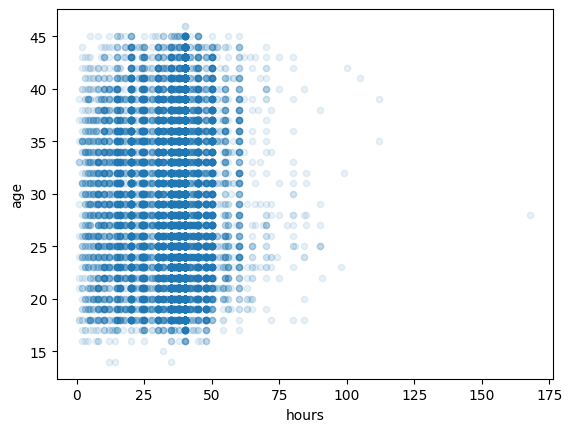

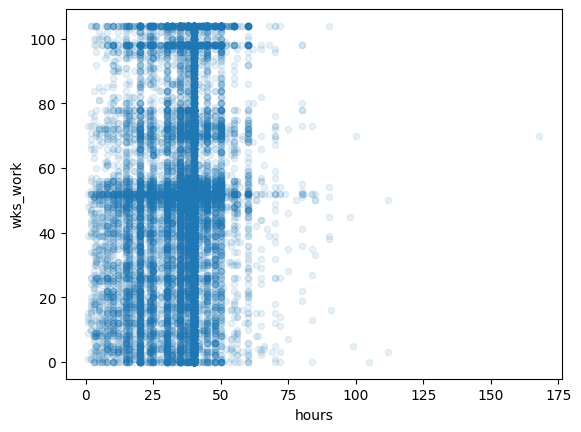

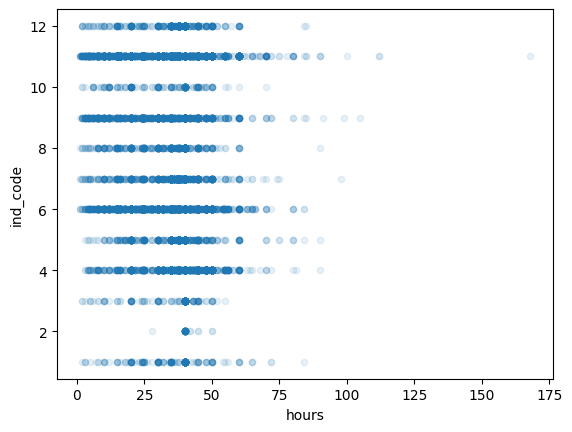

In [5]:
##Visualize the dataset
# Hours vs. age
data.plot(x="hours", y="age", kind="scatter", alpha = 0.1)

# Hours vs. wks_wokr
data.plot(x="hours", y="wks_work", kind="scatter", alpha = 0.1)

# Hours vs. industry
data.plot(x="hours", y="ind_code", kind="scatter", alpha = 0.1)

In [6]:
##Tabulate college and union status
data[["collgrad", "union"]]

,collgrad,union
0,False,True
1,False,True
2,False,True
3,False,True
4,False,True
...,...,...
28529,False,True
28530,False,False
28531,False,True
28532,False,True


In [7]:
##Generate a variable for log hours worked
data["hours_log"] = data["hours"].agg(math.log)

/var/folders/jm/5shjm4t12dx74z6gz4zv21dr0000gn/T/ipykernel_1048/333264410.py:2: FutureWarning: using <built-in function log> in Series.agg cannot aggregate and has been deprecated. Use Series.transform to keep behavior unchanged.
  data["hours_log"] = data["hours"].agg(math.log)


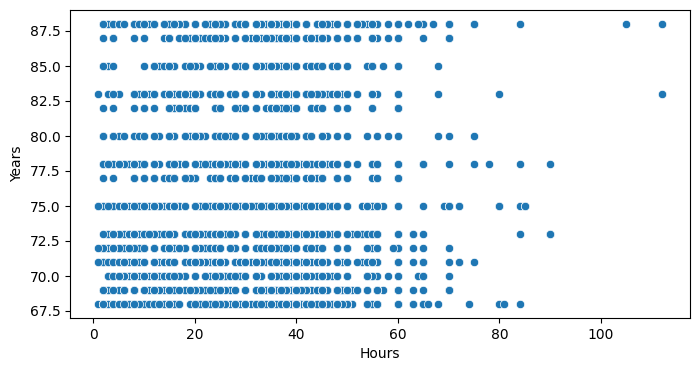

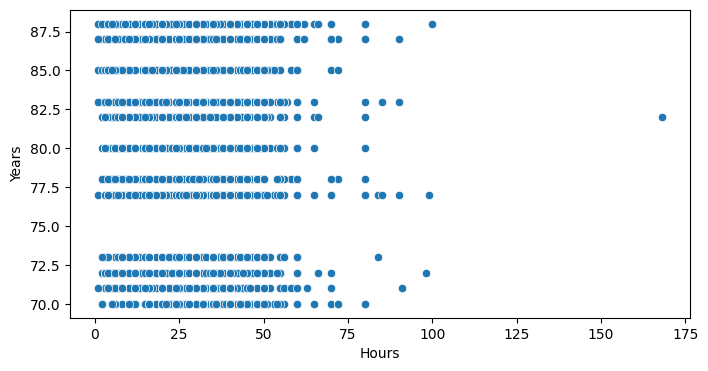

In [8]:
##plot log hours against year separately for union and non-union

# Union
plt.figure(figsize=(8, 4))
sns.scatterplot(data=data[data["union"] == True], x="hours", y="year")
plt.xlabel("Hours")
plt.ylabel("Years")
plt.show()

# Non-union
plt.figure(figsize=(8, 4))
sns.scatterplot(data=data[data["union"] == False], x="hours", y="year")
plt.xlabel("Hours")
plt.ylabel("Years")
plt.show()

# Regression: Effect of union status on hours worked

In [9]:
##Regress hours worked against union status and display the results
model = smf.ols("hours ~ union", data=data)
res = model.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  hours   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     19.25
Date:                Mon, 09 Oct 2023   Prob (F-statistic):           1.15e-05
Time:                        16:41:40   Log-Likelihood:            -1.0556e+05
No. Observations:               28467   AIC:                         2.111e+05
Df Residuals:                   28465   BIC:                         2.111e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        36.3112      0.081    446.194

In [10]:
##Print or write out the coefficient on union, standard error, t-stat, p-value and confidence interval
"""
union[T.True]     0.5134      0.117      4.388      0.000       0.284       0.743
"""

'\nunion[T.True]     0.5134      0.117      4.388      0.000       0.284       0.743\n'

#### What is the identification assumption for the coefficient on union to be causal?





In [11]:
## add education (collgrad) to the regression and compare the coefficient on union with the previous result
model = smf.ols("hours ~ union + collgrad", data=data)
res = model.fit()
print(res.summary())

"""
coefficient on union:
- hours vs. union: 0.5134;
- hours vs. union + collgrad: 0.5609
"""

                            OLS Regression Results                            
Dep. Variable:                  hours   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     77.92
Date:                Mon, 09 Oct 2023   Prob (F-statistic):           1.80e-34
Time:                        16:41:41   Log-Likelihood:            -1.0549e+05
No. Observations:               28467   AIC:                         2.110e+05
Df Residuals:                   28464   BIC:                         2.110e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           35.9816      0.086  

'\ncoefficient on union:\n- hours vs. union: 0.5134;\n- hours vs. union + collgrad: 0.5609\n'

In [12]:
## add occupation codes to the regression and compare the results with the previous one
model = smf.ols("hours ~ union + collgrad + occ_code", data=data)
res = model.fit()
print(res.summary())

"""
coefficient on union
- hours vs. union: 0.5134;
- hours vs. union + collgrad: 0.5609;
- hours vs. union + collgrad + occ_code: 0.6255
"""

                            OLS Regression Results                            
Dep. Variable:                  hours   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     57.11
Date:                Mon, 09 Oct 2023   Prob (F-statistic):           8.48e-37
Time:                        16:41:41   Log-Likelihood:            -1.0503e+05
No. Observations:               28347   AIC:                         2.101e+05
Df Residuals:                   28343   BIC:                         2.101e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           36.3319      0.118  

'\ncoefficient on union\n- hours vs. union: 0.5134;\n- hours vs. union + collgrad: 0.5609;\n- hours vs. union + collgrad + occ_code: 0.6255\n'

#### In terms of causal inference, why is adding occupation code as a control probably not a good idea?


Some industires might have powerfull unions that de facto determin the hours one has to work. 


??? Is occupation a mideator?

#### What are "good controls" in the dataset in terms of being exogenous to union status?


In [14]:
##add these controls to the regression
model = smf.ols("hours ~ union + collgrad + age + grade", data=data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  hours   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     43.63
Date:                Mon, 09 Oct 2023   Prob (F-statistic):           1.45e-36
Time:                        16:43:11   Log-Likelihood:            -1.0539e+05
No. Observations:               28441   AIC:                         2.108e+05
Df Residuals:                   28436   BIC:                         2.108e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           35.2809      0.528  

- Age could be a relevant factor as older different work hours compared to younger workers.

- The level of education completed seems to comparble to collage education.

#### How do these change your estimates?


The coefficient decreases.

# Short Essay: Correlation/Causation

**Find a news article mistaking correlation for causation. Link to the article and write a short paragraph explaining the mistake.**

[type your comments here, or attach as separate document.]